In [2]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2, os
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

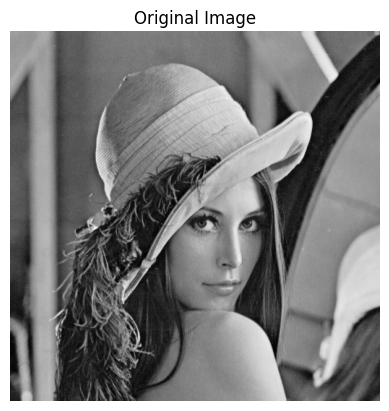

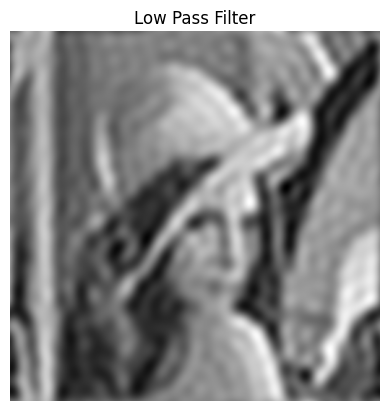

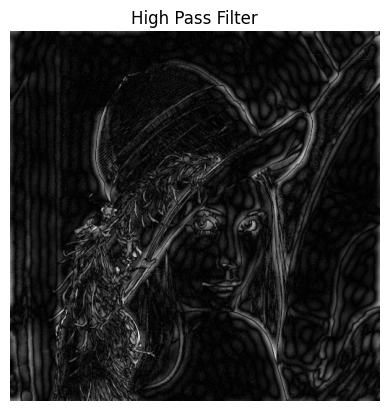

In [3]:
img_path = 'images/Lenna.png'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def lowPassFilter(img, d0):
    rows, cols = img.shape
    crow, ccol = rows//2, cols//2
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i-crow)**2 + (j-ccol)**2) <= d0:
                mask[i, j] = 1
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

def highPassFilter(img, d0):
    rows, cols = img.shape
    crow, ccol = rows//2, cols//2
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mask = np.ones((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i-crow)**2 + (j-ccol)**2) <= d0:
                mask[i, j] = 0
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

def padInnerZeros(img, rows, cols):
    # scale image and pad zeros internally
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    scaled_fshift = np.zeros((rows*2, cols*28), np.complex64)
    scaled_rows, scaled_cols = scaled_fshift.shape
    
    for i in range(scaled_rows):
        for j in range(scaled_cols):
            if i % 2 == 0 and j % 2 == 0:
                scaled_fshift[i, j] = fshift[i//2, j//2]


    f_ishift = np.fft.ifftshift(scaled_fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

def plot(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

plot(img, 'Original Image')
plot(lowPassFilter(img, 20), 'Low Pass Filter')
plot(highPassFilter(img, 20), 'High Pass Filter')

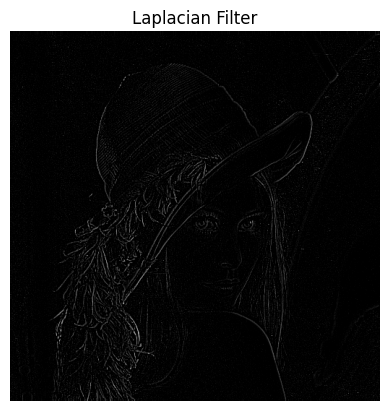

In [10]:
# Define a 13x13 Laplacian kernel
laplacian_kernel = np.array([
    [ -1,  -1, -1],
    [ -1, 8, -1],
    [ -1,  -1, -1 ],
    
], dtype=np.float32)

# Normalize kernel
laplacian_kernel /= np.sum(np.abs(laplacian_kernel))

# Apply 2D convolution
convolved_image = convolve2d(img, laplacian_kernel, mode='same', boundary='symm')

# Normalize and save the result
convolved_image = np.clip(convolved_image, 0, 255).astype(np.uint8)
plot(convolved_image, 'Laplacian Filter')
